# Ayudantía 4 - Diseño de Reactores Batch y Continuo

Dpto. de Ingeniería Química y Bioprocesos

Diseño de Reactores - IIQ2113

Ayudante: Emilia Violic Montalba  - eviolic@uc.cl

Para abrir en Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/SysBioengLab/IIQ2113-Chemical-reactor-design/blob/main/Ayudantias/Ayudantia4.ipynb)

### Problema 3 - Diseño de Reactores CSTR En Serie

Se tiene una alimentación de A a una velocidad de flujo molar constante 5 $mol/min$ y una concentración de entrada de 1 $mol/L$. La reacción que ocurre es de primer orden y se lleva a cabo en dos reactores CSTR conectados en serie, bajo condiciones isotérmicas. La constante de velocidad es k = 0,3 $min^{-1}$. 

1. Grafique $F_{A0}/-r_{A}$ en función de la conversión $X_{A}$, para $ 0 < X_{A} < 0,99$.

2. Determine el volumen requerido para cada reactor si se desea alcanzar una conversión global de 90\%, asumiendo que el primer reactor opera hasta una conversión intermedia de 50\%. 

3. Estime el volumen total requerido para los dos CSTR en serie y compare con el volumen requerido si solo se utilizara un CSTR. Discuta brevemente por qué operar dos CSTR en serie puede ser ventajoso frente a un solo CSTR de igual conversión. 

In [1]:
# Paso 0: Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Paso 1: Datos del Problema
FA0 = 5 # mol/min
CA0 = 1 # mol/L
k = 0.3 # 1/min

In [3]:
# Paso 2: Definir Curva de Diseño
#Dominio de Conversión 
X = np.linspace (0.01, 0.99, 100) # Evitar X = 1 para no dividir por cero
rA = k * CA0 * (1-X) 
y = FA0 / rA


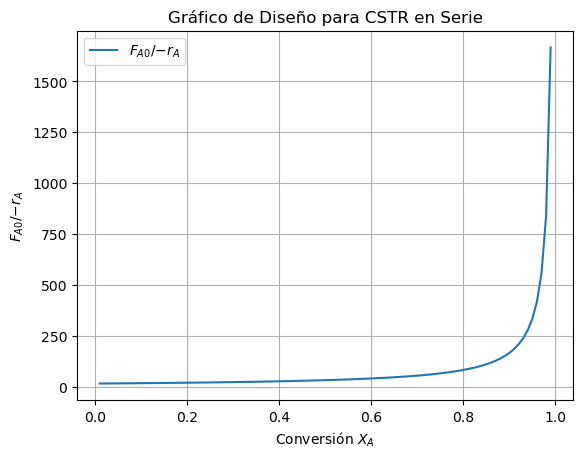

In [4]:
# Paso 3: Graficar Curva de Diseño
plt.plot(X,y,label=r"$F_{A0}/{-r_A}$")
plt.xlabel("Conversión $X_A$")
plt.ylabel(r"$F_{A0}/{-r_A}$")
plt.title("Gráfico de Diseño para CSTR en Serie")
plt.legend()
plt.grid()
plt.show()

In [5]:
# Paso 4: Cálculo de volúmenes
X1 = 0.5
X2 = 0.9

rA1 = k * CA0 * (1 - X1)
rA2 = k * CA0 * (1 - X2)

V1 = FA0 * (X1) / rA1
V2 = FA0 * (X2 - X1) / rA2
V_total = V1 + V2

print(f"Volumen CSTR 1: {V1:.2f} L")
print(f"Volumen CSTR 2: {V2:.2f} L")
print(f"Volumen total: {V_total:.2f} L")    

Volumen CSTR 1: 16.67 L
Volumen CSTR 2: 66.67 L
Volumen total: 83.33 L


In [6]:
# Paso 5: Comparación con un solo CSTR

X2 = 0.9  # Conversión deseada para un solo CSTR
rA2 = k * CA0 * (1 - X2) # Velocidad de reacción evaluada a la salida del CSTR

# Volumen requerido para alcanzar X = 0.9 en un solo CSTR
V_CSTR_unico = FA0 * X2 / rA2

print(f"Volumen requerido en un solo CSTR hasta X = 0.9: {V_CSTR_unico:.2f} L")


Volumen requerido en un solo CSTR hasta X = 0.9: 150.00 L



### Comparación entre un solo CSTR y dos CSTRs en serie

| Diseño                          | Volumen requerido [L] |
|---------------------------------|------------------------|
| **Un solo CSTR hasta X = 0,9**  | **150,00**             |
| **CSTR 1 (X: 0 → 0,5)**         | 16,67                  |
| **CSTR 2 (X: 0,5 → 0,9)**       | 66,67                  |
| **Total en serie**              | **83,33**              |

Comparando el diseño de un solo CSTR con el de dos CSTRs en serie para alcanzar una conversión del 90%, se puede ver que la segunda opción requiere bastante menos volumen total. Esto se debe a que en un único CSTR, la concentración del reactante a la salida es muy baja, lo que significa que la velocidad de reacción también lo es, y por lo tanto se necesita un volumen mucho mayor para compensar eso.

En cambio, al dividir el sistema en dos reactores en serie, el primer CSTR trabaja en una zona donde la reacción ocurre más rápido (porque hay más concentración de A), y el segundo solo tiene que terminar la conversión desde un punto intermedio. Así se aprovecha mejor la cinética de la reacción.

Este tipo de estrategia no solo reduce el volumen necesario, sino que también puede ser más eficiente en términos operacionales y económicos. Por eso, usar varios CSTRs en serie es una práctica común cuando se buscan conversiones altas sin aumentar demasiado el tamaño del equipo.


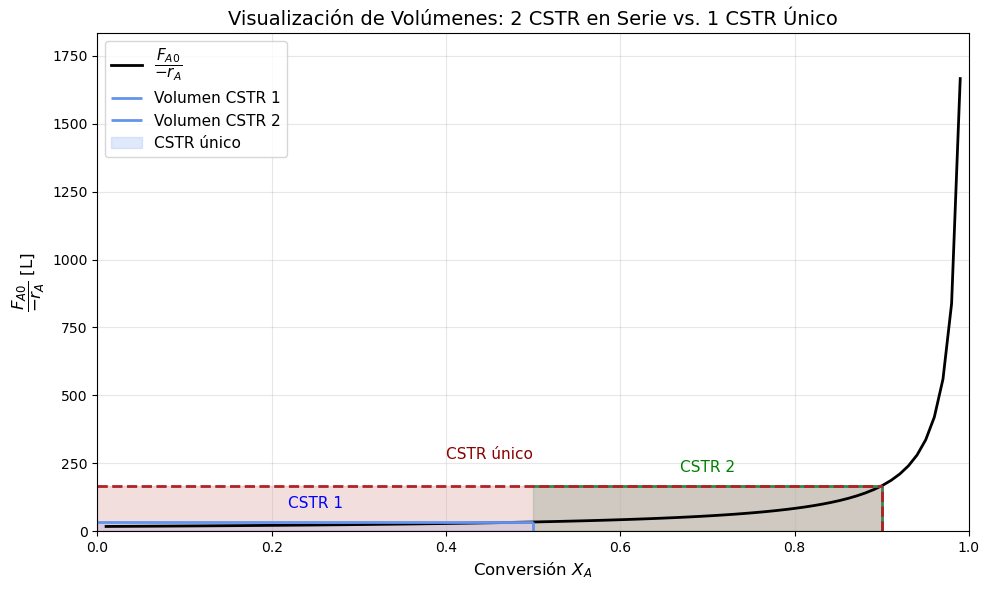

In [7]:
# Paso 6: Visualización de volúmenes con 2 CSTR en serie vs. 1 CSTR
# Este paso no es obligatorio/necesario, pero ayuda a entender mejor el problema de una manera visual. 

# Curva de diseño
plt.figure(figsize=(10,6))
plt.plot(X, y, label=r'$\dfrac{F_{A0}}{-r_A}$', color='black', linewidth=2)

# CSTR 1
plt.vlines(X1, 0, FA0/rA1, color='cornflowerblue', linewidth=2)
plt.hlines(FA0/rA1, 0, X1, color='cornflowerblue', linewidth=2)
plt.fill_between([0, X1], 0, FA0/rA1, color='cornflowerblue', alpha=0.2)
plt.annotate('CSTR 1', xy=(X1/2, FA0/rA1 + 50), ha='center', fontsize=11, color='blue')

# CSTR 2
plt.vlines(X2, 0, FA0/rA2, color='seagreen', linewidth=2)
plt.hlines(FA0/rA2, X1, X2, color='seagreen', linewidth=2)
plt.fill_between([X1, X2], 0, FA0/rA2, color='seagreen', alpha=0.2)
plt.annotate('CSTR 2', xy=((X1+X2)/2, FA0/rA2 + 50), ha='center', fontsize=11, color='green')

# CSTR único
plt.vlines(X2, 0, FA0/rA2, color='firebrick', linestyle='--', linewidth=2)
plt.hlines(FA0/rA2, 0, X2, color='firebrick', linestyle='--', linewidth=2)
plt.fill_between([0, X2], 0, FA0/rA2, color='firebrick', alpha=0.15)
plt.annotate('CSTR único', xy=(X2/2, FA0/rA2 + 100), ha='center', fontsize=11, color='darkred')

# Estética
plt.xlabel('Conversión $X_A$', fontsize=12)
plt.ylabel(r'$\dfrac{F_{A0}}{-r_A}$ [L]', fontsize=12)
plt.title('Visualización de Volúmenes: 2 CSTR en Serie vs. 1 CSTR Único', fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, max(y)*1.1)
plt.legend([
    r'$\dfrac{F_{A0}}{-r_A}$',
    'Volumen CSTR 1',
    'Volumen CSTR 2',
    'CSTR único'
], fontsize=11)
plt.tight_layout()
plt.show()
